In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("fifa_stats.csv")

In [5]:
df.isnull().sum()

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64

In [8]:
df[df["Club"].isnull()==True]

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
452,L. Paredes,24,Argentina,80,85,NaN,Right,2,4,4,Medium/ Medium,CM,5,5.083333,165
538,A. Granqvist,33,Sweden,80,80,NaN,Right,2,4,2,High/ Medium,LCB,4,6.333333,185
568,A. Lunev,26,Russia,79,81,NaN,Right,1,3,1,Medium/ Medium,GK,12,6.166667,176
677,I. Smolnikov,29,Russia,79,79,NaN,Right,2,3,3,High/ High,RB,2,5.083333,154
874,A. Dzyuba,29,Russia,78,78,NaN,Right,2,3,3,High/ Medium,ST,22,6.416667,201
953,LuÃ­s Neto,30,Portugal,77,77,NaN,Right,1,3,2,Medium/ Medium,CB,4,6.166667,157
997,D. Kuzyaev,25,Russia,77,80,NaN,Right,1,3,3,Medium/ High,RM,7,6.000000,163
1008,G. Sio,29,Ivory Coast,77,77,NaN,Left,2,3,3,High/ Low,ST,21,5.083333,176
1120,J. Villar,41,Paraguay,77,77,NaN,Right,2,3,1,Medium/ Medium,GK,1,5.083333,187
1271,C. Riveros,35,Paraguay,76,76,NaN,Right,1,3,3,Medium/ Medium,CAM,16,5.083333,163


1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information, which includes height; weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed. 

a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size



In [39]:
import random
lista=list(df["Age"])
listm=[]
for i in range (10000):
    list1=[]
    for i in range(200):
            list1.append(random.choices(lista))
    
    listm.append(np.mean(list1))
    


In [40]:
np.mean(listm)


27.232823000000003

In [36]:
np.mean(df["Age"])

27.2315

In [ ]:
# The mean of the sample means is almost equal to the mean of the population


<AxesSubplot:ylabel='Density'>

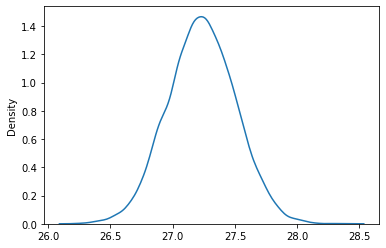

In [41]:
sns.kdeplot(listm)
#it is almost normal

In [42]:
# standard error= sigma/root(n)
se=df.Age.std()/np.sqrt(2000)
se

0.08629123341036274

In [43]:
# Mean of sampling distribution
np.mean(listm)

27.232823000000003

In [44]:
# Mean of Population
df["Age"].std()

3.8590612753574423

In [ ]:
# THe mean of sample means=mean of population
# The sample distribution is normal but the population is not

In [ ]:
# As the sample size increases the sample becomes more representative of the population
# therefore as the sample size increases the error value reduces

b)	Is there any evidence that the players overall rating is greater than 80?

In [25]:
#null hypothesis : overall rating<=80
# alternate hypothesis : overall rating >80



u=df["Overall_rating"].mean()
mu=80
sig=df["Overall_rating"].std()
t=(u-mu)/(sig/np.sqrt(2000))
t

-24.538460498672645

In [28]:
tcrit=stats.t.isf(0.05,df=1999)

In [30]:
t<tcrit

True

In [ ]:
# We fail to reject null hypothesis
# overall rating <=80

c) Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

In [ ]:
# NUll Hypothesis : Preferred foot and Potential are unrelated
# Alternate Hypothesis : Preferred foot and Potential are related

In [39]:
t,p=stats.f_oneway(df[df["Preferred Foot"]=="Left"]["Potential"],df[df["Preferred Foot"]=="Right"]["Potential"])

In [40]:
p>0.05

True

In [ ]:
# There we fail to reject null hypothesis

<AxesSubplot:xlabel='Preferred Foot', ylabel='Potential'>

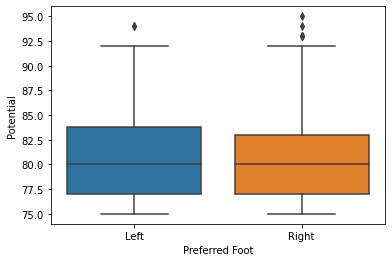

In [44]:
# graphical analysis
sns.boxplot(y=df["Potential"],x=df["Preferred Foot"])

In [ ]:
# there is not much difference between left and right foot


d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].


In [ ]:
# Null Hypothesis : The two variables are independent
# Alternate Hypothesis : The two variables are dependent

In [50]:
df["Overall_rating"]
df["Potential"]
t,p=stats.ttest_ind(df["Overall_rating"],df["Potential"])

In [51]:
p>0.05

False

In [52]:
# We Reject the NUll Hypothesis

e)	Does skill move have any effect in overall rating? Perform the graphical analysis and the statistical analysis.

In [67]:
df["Skill Moves"].unique()

array([4, 5, 1, 3, 2], dtype=int64)

In [68]:
df["Skill Moves"]=df["Skill Moves"].astype("object")

In [58]:
# Null: There is no relation between skill moves and overall rating
# Alternate : There is relation between skill moves and overall rating



In [60]:
f,p=stats.f_oneway(df[df["Skill Moves"]==1]["Overall_rating"],
              df[df["Skill Moves"]==2]["Overall_rating"],
              df[df["Skill Moves"]==3]["Overall_rating"],
              df[df["Skill Moves"]==4]["Overall_rating"],
              df[df["Skill Moves"]==5]["Overall_rating"])

In [69]:
p<0.05

True

In [62]:
#Therefore we reject the null hypothesis 
#There is a relationship between skill moves and overall rating


<AxesSubplot:xlabel='Skill Moves', ylabel='Overall_rating'>

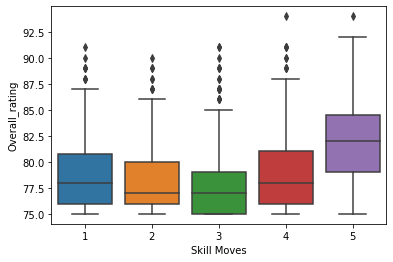

In [71]:
#Statistical Analysis
sns.boxplot(y=df["Overall_rating"],x=df["Skill Moves"])
# as you can see there is a difference

# Mobile networks data set

In [66]:
df1=pd.read_csv("phone.csv")
df1

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...
815,10-03-15 6:58,185.328156,data,2015-03,data,data
816,11-03-15 6:58,89.819383,data,2015-03,data,data
817,12-03-15 6:58,117.604998,data,2015-03,data,data
818,13-03-15 0:39,77.834006,sms,2015-03,Vodafone,mobile


In [49]:
df1.isnull().sum()

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

a) With 95% & 99% Confidence Interval, find the range estimate of average duration calls made by the entire network. Which of the Intervals are wider? Interpret the results

In [50]:
df1.shape

(820, 6)

In [3]:
stats.shapiro(df1["duration"])
# as p-value>0.05
# normally distributed so we can perform z test

ShapiroResult(statistic=0.9984679818153381, pvalue=0.701244592666626)

In [53]:
pop_mean=df1["duration"].mean()
pop_std=df1["duration"].std()

stats.norm.interval(0.95,loc=pop_mean,scale=pop_std/np.sqrt(820))

(141.1778397288302, 147.4320313908407)

In [54]:
stats.norm.interval(0.99,loc=pop_mean,scale=pop_std/np.sqrt(820))

(140.19523500408818, 148.41463611558274)

The 99% confidence is wider than the 95% confidence as 
the area under the curve increases with increased confidence interval

b) Perform statistical analysis to check whether the networks are 
equally distributed in the dataset.

In [56]:
df1["network"].value_counts()

Three        215
Vodafone     215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

In [59]:
obs=[215,215,150,87,84,42,27]
exp=[117,117,117,117,117,117,117]

In [60]:
#null hypothesis: The Values are equally distributed
# alternate hypothesis : The values are not equally distributed


In [62]:
chi,p=stats.chisquare(obs,exp)
p<0.05

True

We reject the null hypothesis 
The values are not equally distributed

c) Plot the distribution of duration with respect to each network in the same graph and interpret the results from the graph.

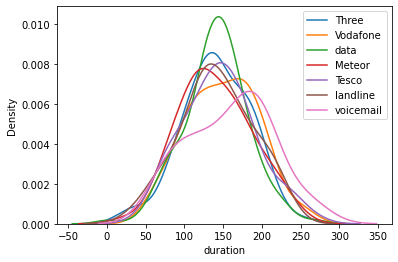

In [73]:
sns.kdeplot(df1[df1["network"]=="Three"]["duration"],label="Three")
sns.kdeplot(df1[df1["network"]=="Vodafone"]["duration"],label="Vodafone")
sns.kdeplot(df1[df1["network"]=="data"]["duration"],label="data")
sns.kdeplot(df1[df1["network"]=="Meteor"]["duration"],label="Meteor")
sns.kdeplot(df1[df1["network"]=="Tesco"]["duration"],label="Tesco")
sns.kdeplot(df1[df1["network"]=="landline"]["duration"],label="landline")
sns.kdeplot(df1[df1["network"]=="voicemail"]["duration"],label="voicemail")
plt.legend()
plt.show()


In [ ]:
# inferences
# data looks like it has the most normal distribution
# some of the distributions have multiple modes
# means of the distribution seem to be close

d)	Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required

In [75]:
df1["item"].unique()

array(['data', 'call', 'sms'], dtype=object)

In [67]:
stats.shapiro(df1["duration"])
# as p-value>0.05
# this data follows normal distribution


ShapiroResult(statistic=0.9984679818153381, pvalue=0.701244592666626)

In [74]:
stats.levene(df1[df1["item"]=="call"]["duration"],
              df1[df1["item"]=="sms"]["duration"],
              df1[df1["item"]=="data"]["duration"])
# we fail levene test

LeveneResult(statistic=3.4300976447008424, pvalue=0.03285087780533987)

In [70]:
# however even though the variances are not equal they are pretty close so the test should be accurate 
# so we go ahead
print(df1[df1["item"]=="data"]["duration"].var(),
              df1[df1["item"]=="call"]["duration"].var(),
              df1[df1["item"]=="sms"]["duration"].var())

1715.4028005929426 2167.275990908408 2160.7929871801025


In [ ]:
#null hypothesis : There is no relation between item and duration
# alternate hypothesis : there is a relation between item and duration

In [72]:
f,p=stats.f_oneway(df1[df1["item"]=="data"]["duration"],
              df1[df1["item"]=="call"]["duration"],
              df1[df1["item"]=="sms"]["duration"])

In [73]:
p>0.05

True

In [ ]:
# We fail to reject the null hypothesis.There is no relation between item and duration

e) 	Perform statistical tests to identify the relation between network and network_type. 
 


In [89]:
# ho: there is no relation between network and network_type
# ha : there is a relation between network and network_type
data=pd.crosstab(df1["network"],df1["network_type"])

data

network_type,data,landline,mobile,voicemail
network,,,,
Meteor,0,0,87,0
Tesco,0,0,84,0
Three,0,0,215,0
Vodafone,0,0,215,0
data,150,0,0,0
landline,0,42,0,0
voicemail,0,0,0,27


In [90]:
chi,p,df,arr=stats.chi2_contingency(data)

In [88]:
p<0.05

True

In [ ]:
# We reject null hypothesis.There is a relation between network and network_type

In [75]:
phone=pd.read_csv('phone.csv')

In [76]:
call = phone[phone['item']=='call']['duration']
sms = phone[phone['item']=='sms']['duration']
data     = phone[phone['item']=='data']['duration']

In [77]:
test = stats.levene(call,sms,data)
print('Test Statistic:',test[0])
print('p_value:',test[1])


Test Statistic: 3.4300976447008424
p_value: 0.03285087780533987
